In [2]:
import requests
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# The default limit is 100 rows. 
# how to know the upper limit 
# code it such that all the rows are extracted. &limit=50000
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=a41ce851-728e-4d65-8dc5-e0515a01ff31&limit=70000'

data = requests.get(url).text
final = json.loads(data)['result']['records']

df = pd.DataFrame(final)


In [4]:
df.columns
df.describe()

,_id
count,34125.000000
mean,17063.000000
std,9851.183305
min,1.000000
25%,8532.000000
50%,17063.000000
75%,25594.000000
max,34125.000000


### Yearly Registeration of Property Agents
1. 2011 -> 2012 saw a 20% decline in the no: of registered property agents. 
2. 2016 -> 2019 saw a smooth increase in the no: of registered property agents. 
3. 2020 and 2022 saw a dip in the registerations. 

    registration_start_yr  salesperson_count
0                    2011               5289
1                    2012                955
2                    2013               1591
3                    2014               1237
4                    2015               1428
5                    2016               1430
6                    2017               2614
7                    2018               3050
8                    2019               3628
9                    2020               3237
10                   2021               5197
11                   2022               4469


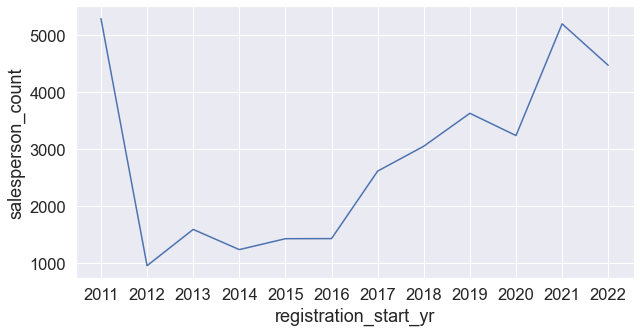

   registration_end_yr  salesperson_count
0                 2022              34125


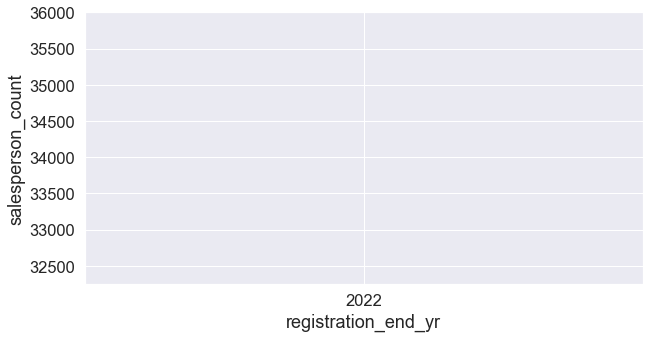

In [15]:

for origin_col_name, derived_col_name in zip(('registration_start_date', 'registration_end_date'),('registration_start_yr', 'registration_end_yr')):
   
    # convert the date columns into datetime format.
    df[origin_col_name] = pd.to_datetime(df[origin_col_name])
    df[derived_col_name] = df[origin_col_name].dt.year
    df[df[derived_col_name] != 2023]

    # The category should not be put as an index, but rather as a separate column 
    # For above, us as_index = False or to_frame().reset_index()
    df_grouped = df.groupby(derived_col_name, as_index=False)['salesperson_name'].count() # it's a series object. 
    df_grouped.rename(columns = {'salesperson_name':'salesperson_count'},inplace=True)
    print(df_grouped)
    
    # plot details
    plt.figure(figsize=(10,5))
    sns.lineplot(x=derived_col_name, y='salesperson_count', data = df_grouped)
    plt.xticks(df_grouped[derived_col_name])
    plt.show()



### Over the course of 11 years, which propery agencies have been the most popular ? 
1) Propnex, ERA Realty, Huttons Asia , OrangeTee and Sri have been top 5 agencies with highest # of agents registered. 

Total no: of Estate agencies: 1137


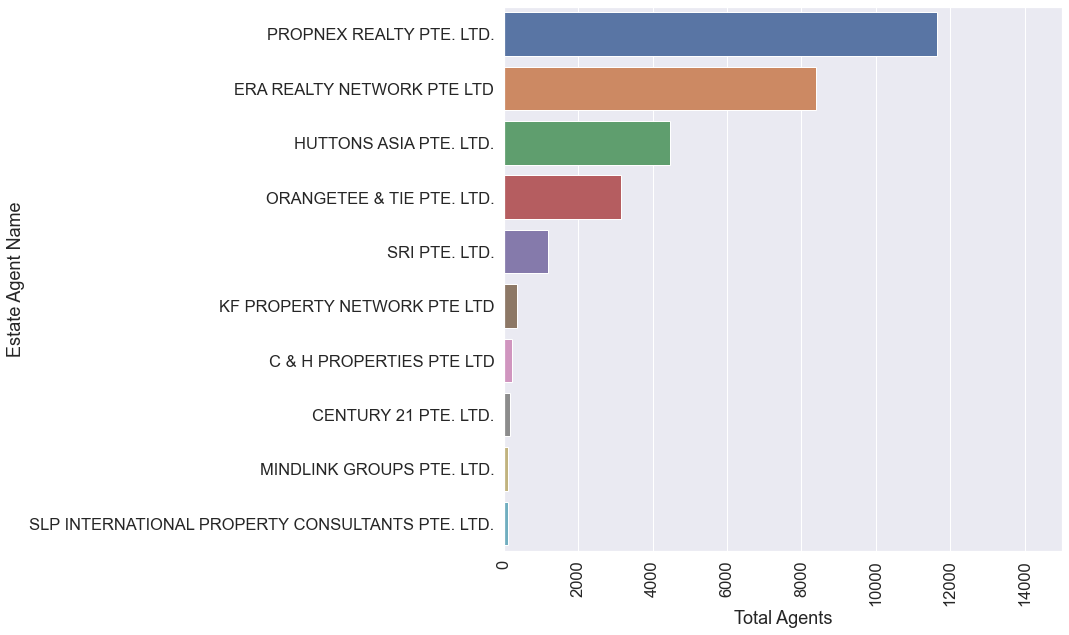

In [20]:
df_grouped = df.groupby('estate_agent_name', as_index=False)['salesperson_name'].count() 
df_grouped.rename(columns={'salesperson_name':'salesperson_count'}, inplace=True)
df_grouped = df_grouped.sort_values(by='salesperson_count', ascending=False)
df_grouped
print('Total no: of Estate agencies:', len(df_grouped))
df_grouped = df_grouped.head(10)

# 80% of the agents are in the 5 agencies. 
plt.figure(figsize=(10,10))

sns.barplot(data=df_grouped, y="estate_agent_name", x='salesperson_count')
plt.xlim(0,15000)
plt.xticks(rotation=90)
plt.xlabel('Total Agents')
plt.ylabel('Estate Agent Name')
# Bring the y-axis to the top and also display the data labels at the top of each bar 
plt.show()


### Over the course of 11 years, which property agencies have been the most popular ? 
1) Propnex, ERA Realty, Huttons Asia , OrangeTee and Sri have been top 5 agencies that account for 85% of the total property agent registerations. 

In [21]:
df_grouped['cum_count'] = round(df_grouped['salesperson_count'].cumsum()/len(df) * 100 ,2)
df_grouped


# 80% of the agents are registered with 4 companies. 
# 1. Propnex Realty
# 2. ERA Realty
# 3. Huttons Asia 
# 4. OrangeTee & Tie Pte. Ltd. 

,estate_agent_name,salesperson_count,cum_count
820,PROPNEX REALTY PTE. LTD.,11633,34.09
320,ERA REALTY NETWORK PTE LTD,8405,58.72
460,HUTTONS ASIA PTE. LTD.,4467,71.81
740,ORANGETEE & TIE PTE. LTD.,3155,81.05
973,SRI PTE. LTD.,1177,84.50
552,KF PROPERTY NETWORK PTE LTD,364,85.57
156,C & H PROPERTIES PTE LTD,216,86.20
182,CENTURY 21 PTE. LTD.,161,86.68
681,MINDLINK GROUPS PTE. LTD.,106,86.99
956,SLP INTERNATIONAL PROPERTY CONSULTANTS PTE. LTD.,99,87.28


#### Have these property agencies retained their respective ranks throughout each year ? 

In [9]:
df = df[df.registration_start_yr != 2023]
df_grouped2 = df.groupby(by=['registration_start_yr', 'estate_agent_name'],as_index=False)['salesperson_name'].count()
df_grouped2["yearly_count"] = df_grouped2.groupby(['registration_start_yr'])["salesperson_name"].transform("sum")

df_grouped2['percent_share'] = round(df_grouped2['salesperson_name']*100/df_grouped2['yearly_count'],2)
df_grouped2 = df_grouped2.sort_values(['registration_start_yr', 'percent_share'],ascending=False).groupby('registration_start_yr').head(5)
# df.sort_values([column names- groupby for each year and sort in descending order by percent_share])

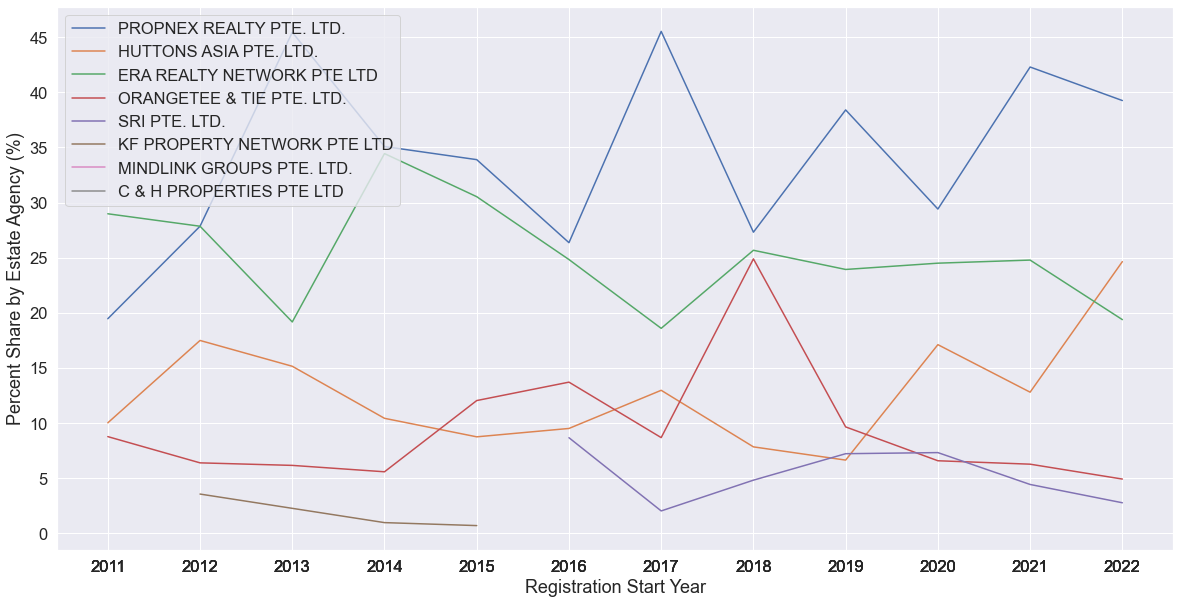

In [22]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.lineplot(x='registration_start_yr', y='percent_share', hue='estate_agent_name', data =df_grouped2)
# plt.xlabel(df_grouped2['registration_start_yr'])

# Change titles for the X axis and the Y axis
plt.xlabel('Registration Start Year')
plt.ylabel('Percent Share by Estate Agency (%)')

# Show all the labels on the X-axis 
plt.xticks(df_grouped2['registration_start_yr'])
plt.yticks(range(0,50,5))
# Adjust the type of the legend
plt.legend(loc='upper left')

plt.show()

### Annual trend of the registerations. 
1. 2011 -> 2012 saw a 20% decline in the no: of registered property agents. 2012 recorded the lowest no: of registerations. 
2. 2016 -> 2019 saw a smooth increase in the no: of registered property agents. 
3. 2020 and 2022 saw a dip in the registerations. 

### Top property agent companies
4. On an average over the decade (2012-2022), Propnex has occupied annual 30-40% share of the new registerations, followed by ERA Realty Network.
5. OrangeTee saw a spike in % share in the year 2018. In 2018 ,top 3 agencies reached an equity.
5. Mindlink Groups only came up in 2013 ? C&H properties disappeared after 2011 out of the top 5 slot.
6. the colour order has been preserved as per the year 2022. 
